In [1]:
setdefaults

In [2]:
%plot --format svg

# Statistics and Curve-Fitting
## Linear Regression

Often, we have a model with empirical parameters. (e.g. Young's modulus, Poisson's ratio, drag coefficient, coefficient of restitution, spring constant)

Experimental measurements are prone to a number of stochastic (random) factors:

- Environmental noise
  
- Measurement Uncertainty
    
- Factors not accounted in model (e.g. 2D effects of 1D approximation)

These can lead to **noise** (lack of precision) and **bias** (lack of accuracy)

Consider a piece of glass being stretched. 

![movie of stretching glass in microtensile machine](sgs_strain.gif)

It is clear that a straight line is a "good" fit, but how good and what line?

## Statistics

How do we describe *precision* and *accuracy*?

- mean

- standard deviation

Take our class dart problem


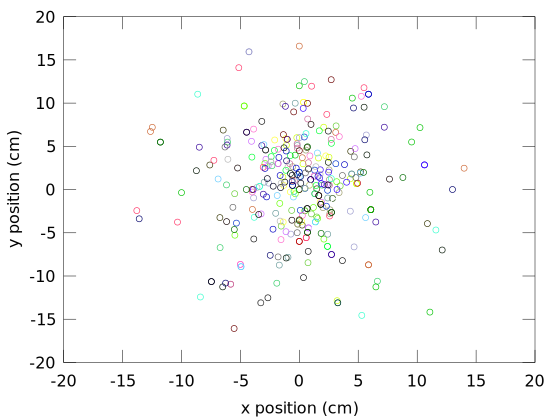

In [19]:
darts=dlmread('compiled_data.csv',',');
x_darts=darts(:,2).*cosd(darts(:,3));
y_darts=darts(:,2).*sind(darts(:,3));

colormap(colorcube(length(darts(:,1))))

scatter(x_darts, y_darts, [], darts(:,1))
xlabel('x position (cm)')
ylabel('y position (cm)')
axis([-20 20 -20 20])

In [20]:
mu_x=mean(x_darts)


mu_x =  0.031765


In [21]:
s_x=std(x_darts)

s_x =  4.2666


In [22]:
mu_y=mean(y_darts)

mu_y =  0.68741


In [23]:
s_y=std(y_darts)

s_y =  5.6245


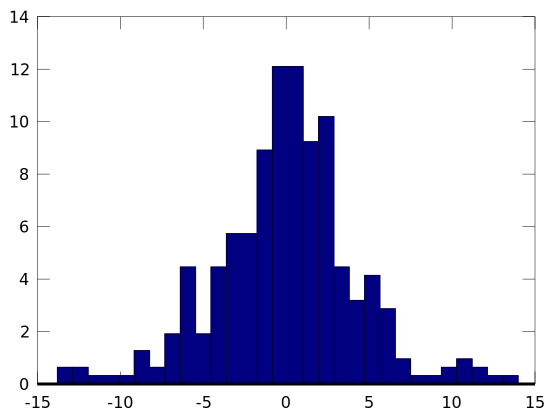

In [24]:
hist(x_darts,30,100)

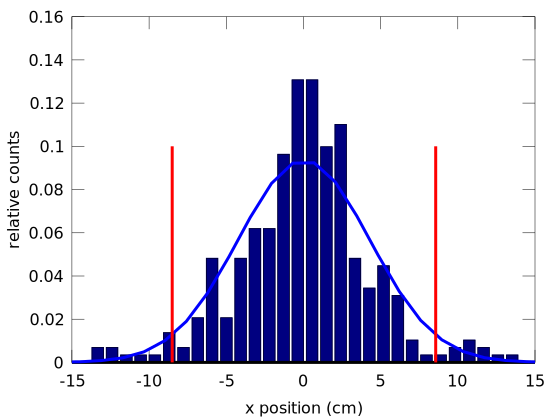

In [32]:
x_vals=linspace(-20,20,30);
hist(x_darts,x_vals,1);
[histFreq, histXout] = hist(x_darts, 30);
binWidth = histXout(2)-histXout(1);
bar(histXout, histFreq/binWidth/sum(histFreq));
pdfnorm = @(x) 1/sqrt(2*s_x^2*pi).*exp(-(x-mu_x).^2/2/s_x^2);
%cdfnorm = @(x) 1/2*(1+erf((x-mu_x)./sqrt(2*s_x^2)));
%hist(x_darts,x_vals,trapz(x,f))%,cdfnorm(max(x_darts))/2)
hold on;
plot(x_vals,pdfnorm(x_vals))
n=2; % n=1, 68% confidence, n=2, 95% confidence, n=3, 99% conf
    plot([mu_x+n*s_x,mu_x+n*s_x],[0,0.1],'r-')
    plot([mu_x-n*s_x,mu_x-n*s_x],[0,0.1],'r-')

xlabel('x position (cm)')
ylabel('relative counts')

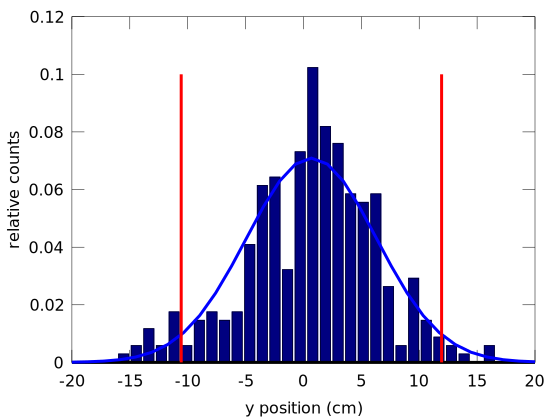

In [31]:
y_vals=linspace(-20,20,30);
hist(y_darts,y_vals,1);
[histFreq, histXout] = hist(y_darts, 30);
binWidth = histXout(2)-histXout(1);
bar(histXout, histFreq/binWidth/sum(histFreq));
pdfnorm = @(x) 1/sqrt(2*s_y^2*pi).*exp(-(x-mu_y).^2/2/s_y^2);
%cdfnorm = @(x) 1/2*(1+erf((x-mu_x)./sqrt(2*s_x^2)));
%hist(x_darts,x_vals,trapz(x,f))%,cdfnorm(max(x_darts))/2)
hold on;
plot(y_vals,pdfnorm(y_vals))
n=2; % n=1, 68% confidence, n=2, 95% confidence, n=3, 99% conf
    plot([mu_y+n*s_y,mu_y+n*s_y],[0,0.1],'r-')
    plot([mu_y-n*s_y,mu_y-n*s_y],[0,0.1],'r-')

xlabel('y position (cm)')
ylabel('relative counts')

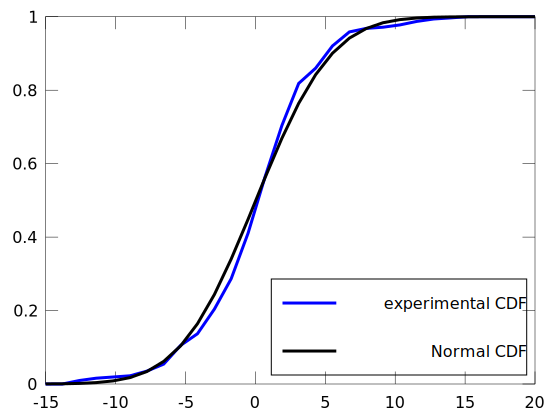

In [27]:
x_exp=empirical_cdf(x_vals,x_darts);
plot(x_vals,x_exp)
hold on;
plot(x_vals,normcdf(x_vals,mu_x,s_x),'k-')
legend('experimental CDF','Normal CDF','Location','SouthEast')

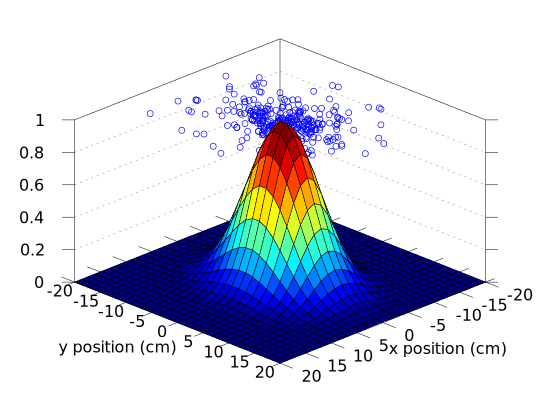

In [28]:
% plot the distribution in x- and y-directions
gauss2d = @(x,y) exp(-((x-mu_x).^2/2/s_x^2+(y-mu_y).^2/2/s_y^2));

x=linspace(-20,20,31);
y=linspace(-20,20,31);
scatter3(x_darts, y_darts,ones(length(x_darts),1))
xlabel('x position (cm)')
ylabel('y position (cm)')
hold on
[X,Y]=meshgrid(x,y);
view([1,1,1])

surf(X,Y,gauss2d(X,Y))

## Linear Least Squares Regression

When approximating a set of data as a polynomial, there will always be error introduced (except in 2 cases). 

For a straight line, the actual data points, $y_{i}$ as a function of the independent variable, $x_{i}$, is:

$y_{i}=a_{0}+a_{1}x_{i}+e_{i}$

where $a_{0}$ and $a_{1}$ are the intercept and slope of the line and $e_{i}$ is the error between the approximate function and the recorded data point. 

We make the following assumptions in this analysis:

1. Each x has a fixed value; it is not random and is known without error.

2. The y values are independent random variables and all have the same variance.

3. The y values for a given x must be normally distributed.

The total error is 

$\sum_{i=1}^{n}e_{i}=\sum_{i=1}^{n}(y_{i}-a_{0}-a_{1}x_{i})$

we don't care about the sign though. One approach has been demonstrated to provide a unique solution is minimizing the sum of squares error or

$S_{r}=\sum_{i=1}^{n}e_{i}^{2}=\sum_{i=1}^{n}(y_{i}-a_{0}-a_{1}x_{i})^{2}$

Where, $S_{r}$ is the sum of squares error (SSE). 

$\frac{\partial S_{r}}{\partial a_{0}}=-2\sum(y_{i}-a_{0}-a_{1}x_{i})$

$\frac{\partial S_{r}}{\partial a_{1}}=-2\sum(y_{i}-a_{0}-a_{1}x_{i})x_{i}$

The minimum $S_{r}$ occurrs when the partial derivatives are 0. 

$\sum y_{i}= \sum a_{0}+\sum a_{1}x_{i}$

$\sum x_{i}y_{i}= \sum a_{0}x_{i}+\sum a_{1}x_{i}^{2}$

$\left[\begin{array}{c}
\sum y_{i}\\
\sum x_{i}y_{i}\end{array}\right]=
\left[\begin{array}{cc}
n & \sum x_{i}\\
\sum x_{i} & \sum x_{i}^{2}\end{array}\right]
\left[\begin{array}{c}
a_{0}\\
a_{1}\end{array}\right]$


$b=Ax$



### Example 

Find drag coefficient with best-fit line to experimental data

|i | v (m/s) | F (N) |
|---|---|---|
|1 | 10 | 25 |
|2 | 20 | 70 |
|3 | 30 | 380|
|4 | 40 | 550|
|5 | 50 | 610|
|6 | 60 | 1220|
|7 | 70 | 830 |
|8 |80 | 1450|

a =

  -234.286
    19.470



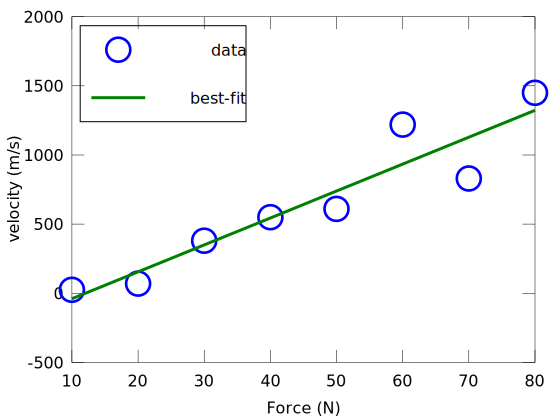

In [200]:
drag_data=[...
1 , 10 , 25 
2 , 20 , 70 
3 , 30 , 380
4 , 40 , 550
5 , 50 , 610
6 , 60 , 1220
7 , 70 , 830 
8 ,80 , 1450];
x=drag_data(:,2);
y=drag_data(:,3);

b=[sum(y);sum(x.*y)];
A=[length(x),sum(x);
    sum(x), sum(x.^2)];
    
a=A\b

plot(x,y,'o',x,a(1)+a(2)*x)
legend('data','best-fit','Location','NorthWest')
xlabel('Force (N)')
ylabel('velocity (m/s)')

How do we know its a "good" fit? 

Can compare the sum of squares error to the total sum of squares of the dependent variable (here F). 

$S_{r}=\sum(y_{i}-a_{0}-a_{1}x_{i})^{2}$

$S_{t}=\sum(y_{i}-\bar{y})^{2}$

Then, we can calculate the *coefficient of determination*, $r^{2}$ or *correlation coefficient*, r. 

$r^{2}=\frac{S_{t}-S_{r}}{S_{t}}$

This represents the relative improvement of assuming that y is a function of x (if the x-values are not random and the y-values are random)

For further information regarding statistical work on regression, look at 
[NIST Statistics Handbook](http://www.itl.nist.gov/div898/handbook/pmd/section4/pmd44.htm)

In [128]:
Sr=sum((y-a(1)-a(2)*x).^2);
St=std(y)^2*(length(y)-1)
St=sum((y-mean(y)).^2)

St =    1.8083e+06
St =    1.8083e+06


In [130]:
r2=(St-Sr)/St
r=sqrt(r2)

r2 =  0.88049
r =  0.93834


### Limiting cases 

#### $r^{2}=0$ $S_{r}=S{t}$

#### $r^{2}=1$ $S_{r}=0$

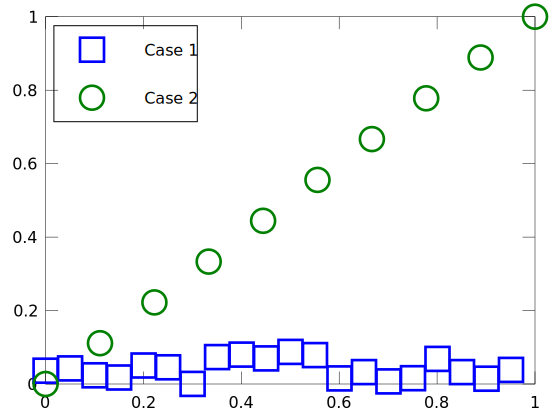

In [152]:
gen_examples
plot(x1(1:50:end),y1(1:50:end),'s',x2,y2,'o')
legend('Case 1','Case 2','Location','NorthWest')

In [157]:
b1=[sum(y1);sum(x1.*y1)];
A1=[length(x1),sum(x1);
    sum(x1), sum(x1.^2)];
    
a1=A1\b1

b2=[sum(y2);sum(x2.*y2)];
A2=[length(x2),sum(x2);
    sum(x2), sum(x2.^2)];
    
a2=A2\b2

Sr1=sum((y1-a1(1)-a1(2)*x1).^2)
St1=sum((y1-mean(y1)).^2)
fprintf('coefficient of determination in Case 1 is %f\n',1-Sr1/St1)

Sr2=sum((y2-a2(1)-a2(2)*x2).^2)
St2=sum((y2-mean(y2)).^2)

fprintf('coefficient of determination in Case 2 is %f\n',1-Sr2/St2)

a1 =

   0.0497269
   0.0016818

a2 =

   0
   1

Sr1 =  0.82607
St1 =  0.82631
coefficient of determination in Case 1 is 0.000286
Sr2 = 0
St2 =  1.0185
coefficient of determination in Case 2 is 1.000000
